# 导入库与包并读取数据

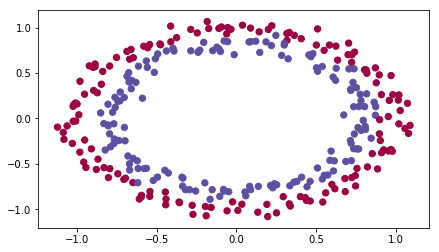

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import sklearn.datasets

from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = load_dataset()

In [29]:
print(train_X.shape)

(2, 300)


# 建立初始模型模型

In [52]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    
    for i in range(0, num_iterations):
        a3, cache = forward_propagation(X, parameters)
        
        cost = compute_loss(a3, Y)
        
        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%1000 == 0:
            print("cost after iteration {}: {} ".format(i, cost))
            costs.append(cost)
            
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("learning rate = "+ str(learning_rate)) 
    plt.show()
    
    return parameters

# 初始化方法zero/random/he 

There are two types of parameters to initialize in a neural network:

    the weight matrices (W[1],W[2],W[3],...,W[L−1],W[L])(W[1],W[2],W[3],...,W[L−1],W[L])
    the bias vectors (b[1],b[2],b[3],...,b[L−1],b[L])

## zeros初始化

In [31]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1])) #np设定是一定要是数组
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1)) #必须是nl,1

    return parameters

In [32]:
#测试
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


cost after iteration 0: 0.6931471805599453 
cost after iteration 1000: 0.6931471805599453 
cost after iteration 2000: 0.6931471805599453 
cost after iteration 3000: 0.6931471805599453 
cost after iteration 4000: 0.6931471805599453 
cost after iteration 5000: 0.6931471805599453 
cost after iteration 6000: 0.6931471805599453 
cost after iteration 7000: 0.6931471805599453 
cost after iteration 8000: 0.6931471805599453 
cost after iteration 9000: 0.6931471805599453 
cost after iteration 10000: 0.6931471805599455 
cost after iteration 11000: 0.6931471805599453 
cost after iteration 12000: 0.6931471805599453 
cost after iteration 13000: 0.6931471805599453 
cost after iteration 14000: 0.6931471805599453 


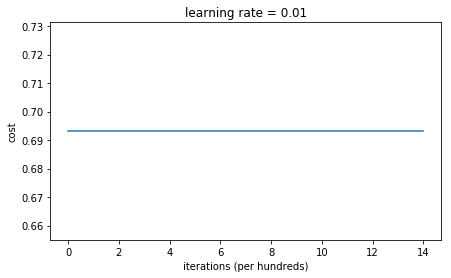

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [33]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [34]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


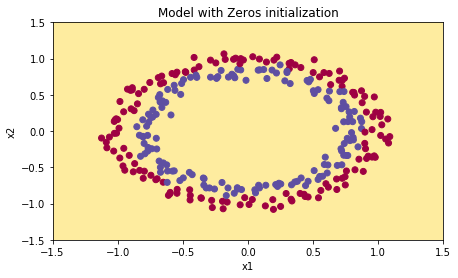

In [36]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y) 

绘图笔记将函数plot_decision_boundary中的c的格式重置c=y.reshape(X[0,:].shape)

In [44]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    for l in range(1,L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    return parameters

In [45]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


/home/tree/git_file/深度学习/第二门课第一周/assign1/init_utils.py:141: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/tree/git_file/深度学习/第二门课第一周/assign1/init_utils.py:141: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


cost after iteration 0: inf 
cost after iteration 1000: 0.6247924745506072 
cost after iteration 2000: 0.5980258056061102 
cost after iteration 3000: 0.5637539062842213 
cost after iteration 4000: 0.5501256393526495 
cost after iteration 5000: 0.5443826306793814 
cost after iteration 6000: 0.5373895855049121 
cost after iteration 7000: 0.47157999220550006 
cost after iteration 8000: 0.39770475516243037 
cost after iteration 9000: 0.3934560146692851 
cost after iteration 10000: 0.3920227137490125 
cost after iteration 11000: 0.38913700035966736 
cost after iteration 12000: 0.3861358766546214 
cost after iteration 13000: 0.38497629552893475 
cost after iteration 14000: 0.38276694641706693 


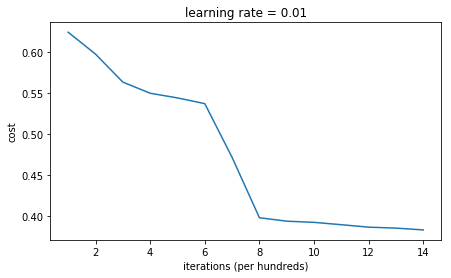

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [53]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

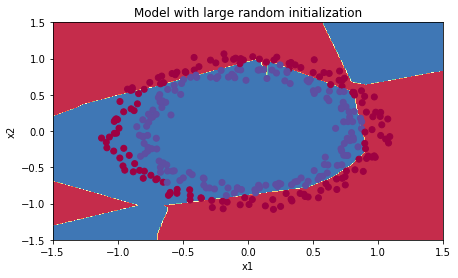

In [54]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# 注意事项

In [23]:
print(np.zeros([1,2]))
print(np.random.randn(1,2))
#同样对于np zeros输入是一个数组生成相应数组和random.randn直接生成相对应的数据矩阵

[[0. 0.]]
[[-0.86230849  1.07168393]]


## 解决梯度爆炸/梯度消失的初始化方法 he初值化

In [55]:
def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) 
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    return parameters

In [56]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


cost after iteration 0: 0.8830537463419761 
cost after iteration 1000: 0.6879825919728063 
cost after iteration 2000: 0.6751286264523371 
cost after iteration 3000: 0.6526117768893805 
cost after iteration 4000: 0.6082958970572938 
cost after iteration 5000: 0.5304944491717495 
cost after iteration 6000: 0.4138645817071794 
cost after iteration 7000: 0.3117803464844441 
cost after iteration 8000: 0.23696215330322562 
cost after iteration 9000: 0.1859728720920684 
cost after iteration 10000: 0.15015556280371808 
cost after iteration 11000: 0.12325079292273551 
cost after iteration 12000: 0.09917746546525937 
cost after iteration 13000: 0.08457055954024283 
cost after iteration 14000: 0.07357895962677366 


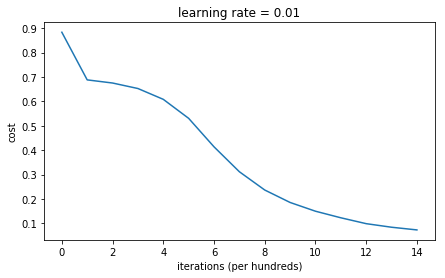

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [57]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

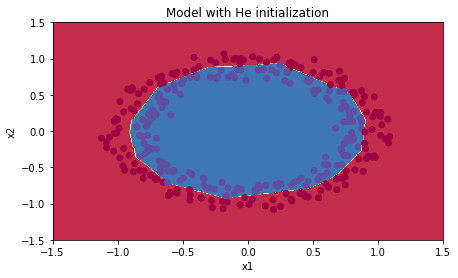

In [58]:


plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

